In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('car_data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [20]:
data.describe()

,Odometer (KM),Doors,Price
count,1000.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,67343.562285,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,72503.000000,4.000000,9529.250000
50%,131253.237895,4.000000,14297.000000
75%,190259.750000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [11]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')

,Odometer (KM)
0,35431.0
1,192714.0
2,84714.0
3,154365.0
4,181577.0
...,...
995,35820.0
996,155144.0
997,66604.0
998,215883.0


In [15]:
df=pd.DataFrame(data['Odometer (KM)'])

In [16]:
si.fit_transform(df)

array([[ 35431.        ],
       [192714.        ],
       [ 84714.        ],
       [154365.        ],
       [181577.        ],
       [ 42652.        ],
       [163453.        ],
       [131253.23789474],
       [130538.        ],
       [ 51029.        ],
       [167421.        ],
       [ 17119.        ],
       [102303.        ],
       [134181.        ],
       [199833.        ],
       [205592.        ],
       [ 96742.        ],
       [194189.        ],
       [ 67991.        ],
       [215820.        ],
       [124844.        ],
       [ 30615.        ],
       [148744.        ],
       [130075.        ],
       [172718.        ],
       [125819.        ],
       [180390.        ],
       [ 82783.        ],
       [ 56687.        ],
       [112004.        ],
       [ 34024.        ],
       [108569.        ],
       [203795.        ],
       [153554.        ],
       [ 71949.        ],
       [191622.        ],
       [ 38186.        ],
       [131253.23789474],
       [1464

In [17]:
data['Odometer (KM)']=si.fit_transform(df)

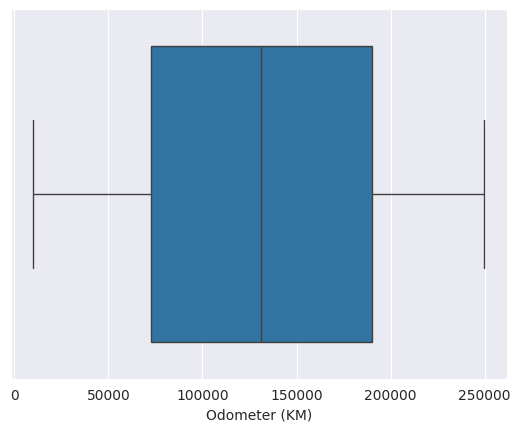

In [19]:
sns.boxplot(x=data['Odometer (KM)'])
plt.show()

There are no OUTLIERS in ODOMETER (KM)

In [21]:
# Now i will try to find outliers in Movies Data
Data=pd.read_csv('Moviesdata.csv')

In [22]:
Data.describe()

,Unnamed: 0,MovieId,userId_x,rating,timestamp_x,userId_y,timestamp_y,imdbId,tmdbId
count,233193.000000,233193.000000,233193.000000,233193.000000,2.331930e+05,233193.000000,2.331930e+05,2.331930e+05,233193.000000
mean,116609.122435,12321.029748,309.676045,3.966609,1.213510e+09,470.677893,1.384779e+09,2.610761e+05,9379.040996
std,67324.980565,28244.911441,178.203517,0.968582,2.250472e+08,153.333902,1.534595e+08,4.414578e+05,36944.632021
min,0.000000,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09,1.234900e+04,11.000000
25%,58298.000000,296.000000,156.000000,3.500000,1.017072e+09,424.000000,1.242494e+09,1.103570e+05,278.000000
50%,116616.000000,1198.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09,1.109120e+05,680.000000
75%,174914.000000,4638.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09,1.724950e+05,1892.000000
max,233212.000000,193565.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09,5.580390e+06,503475.000000


In [39]:
Data.shape

(233193, 12)

In [23]:
Data.isnull().sum()

Unnamed: 0     0
MovieId        0
Title          0
Genres         0
userId_x       0
rating         0
timestamp_x    0
userId_y       0
tag            0
timestamp_y    0
imdbId         0
tmdbId         0
dtype: int64

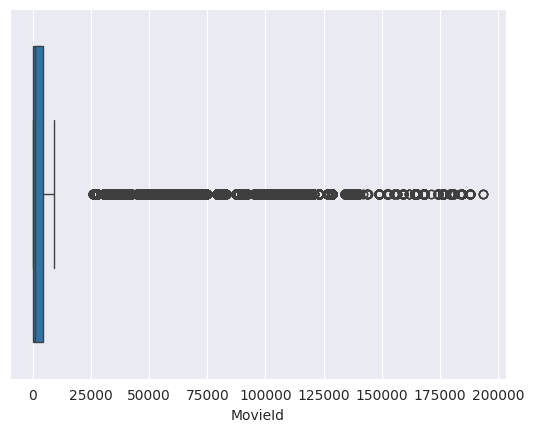

In [27]:
sns.boxplot(x=Data['MovieId'])
plt.show()

/tmp/ipykernel_91032/1367067154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['MovieId'])


<Axes: xlabel='MovieId', ylabel='Density'>

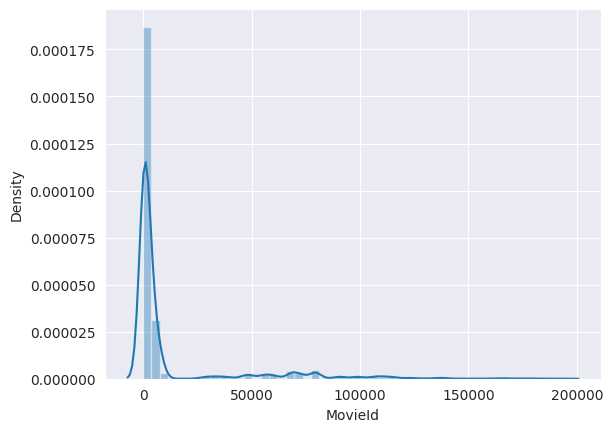

In [30]:
sns.distplot(Data['MovieId'])

# Lets Remove Out;iers

In [34]:
q1=Data['MovieId'].quantile(0.25)
q2=Data['MovieId'].quantile(0.75)
q1,q2

(np.float64(296.0), np.float64(4638.0))

In [35]:
IQR=q2-q1
IQR

np.float64(4342.0)

In [36]:
min_range=q1-(1.5*IQR)
max_range=q2+(1.5*IQR)
min_range,max_range

(np.float64(-6217.0), np.float64(11151.0))

In [37]:
# As we see in Graph, the outliers are in maximum values, So we will accept max_range
Data1=Data[Data['MovieId']<=max_range]

In [38]:
Data1.shape

(199766, 12)

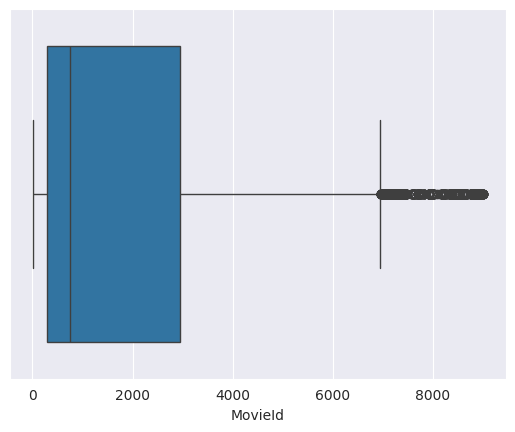

In [40]:
sns.boxplot(x=Data1['MovieId'])
plt.show()

Now there are very low number of Outliers as compared to first one

/tmp/ipykernel_91032/1992774691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data1['MovieId'])


<Axes: xlabel='MovieId', ylabel='Density'>

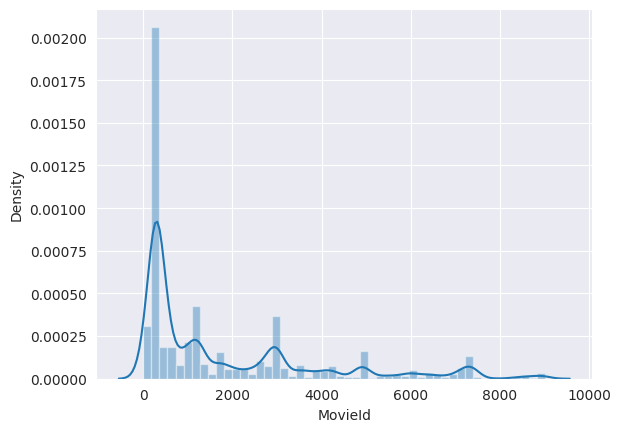

In [41]:
sns.distplot(Data1['MovieId'])

# Removing Outlier directly with Distribution Plot

In [51]:
zmin_range=(Data['MovieId'].mean())-(3*Data['MovieId'].std())
zmax_range=(Data['MovieId'].mean())+(3*Data['MovieId'].std())
zmin_range,zmax_range

(np.float64(-72413.7045745888), np.float64(97055.76407037125))

In [55]:
Data2=Data[Data['MovieId']<=zmax_range]

In [56]:
Data2.shape

(225659, 12)

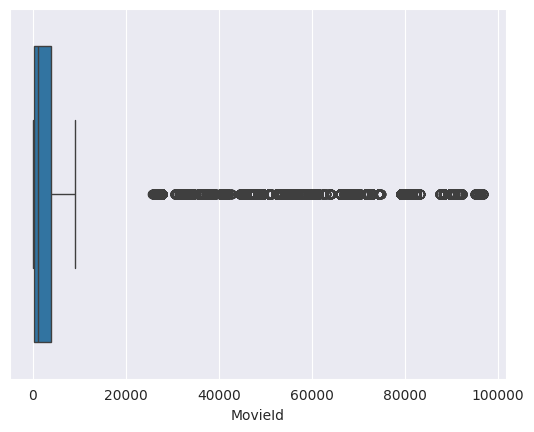

In [58]:
sns.boxplot(x=Data2['MovieId'])
plt.show()

/tmp/ipykernel_91032/3809208870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data2['MovieId'])


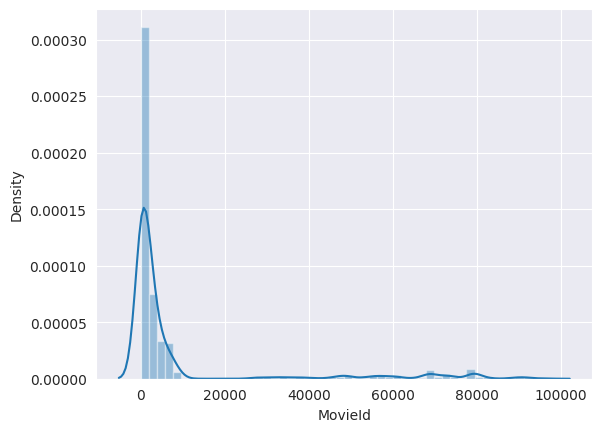

In [61]:
sns.distplot(Data2['MovieId'])
plt.show()